# NYU Introduction to Machine Learning
## Assignment 2

__<font color='red'>Given date: February 20</font>__

__<font color='red'>Due Date: March 8</font>__

__Total: 25pts__

In this assignment you will implement the main regularization approaches as well as cross validation. You will study how the OLS criterion that we used in regression can be extended to classification. 

#### Question 1. Understanding Cross validation (5pts)

Using the lines below load the dataset 'Assignment2_Ex1_xi' and 'Assignment2_Ex1_ti'. Each of the points in the training set is represented by 5 features $x_{i,1}$, $x_{i,2}, \ldots x_{i,5}$. Among those features we want to find those which are the most meaningful to the description of the targets $t_i$. You can think of the targets as expressing for example the probability to develop a particular trait or disease and the features as encoding the expressivity of particular genes. In such a framework the objective would thus mean finding the genes that most influence the particular trait. For this we will implement a Best Subset Selection approach with cross validation. Complete the cell below by implementing the following steps

__1.__ For each number of weights (d=1 to 5) compute all the subsets (beta_i, beta_j, ...) of size d of weights.   
__2.__ Split the training set in K=5 bins, for each bin k=1,...5, learn the weights by using the linear_regression function of scikit learn (do not reimplement gradient descent except if you really have too much time). Learn the weights on the remaining K-1 bins then comute the MSE on bin k. 
__3.__ Find the optimal subset of coefficients by comparing the MSE and plot the MSE as a function of the number k of weights by averaging the errors over the size k subsets. I.e MSE(1) = (1/5)(MSE(beta0) + MSE(beta1) + ...MSE(beta4))


The Minimum MSEs: 
Subset of size 2 : [0.79553122]
Subset of size 3 : [2.7323814e-07]
Subset of size 4 : [5.87230504e-08]
Subset of size 5 : [2.40519384e-08]
Subset of size 6 : [4.06038444e-29]


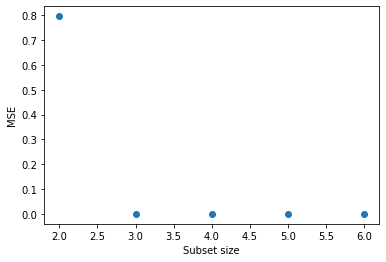

In [6]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from itertools import combinations 

xi = np.load('Assignment2_Ex1_xi.npy')
ti = np.load('Assignment2_Ex1_ti.npy')

# print(xi)
# print(ti)

D = 5 # number of coefficients 

K = 5 # number of bins used for cross validation

# Note that K does not have to be equal to D 
# (this is a choice we make here but we could have taken any value for K)

# Step 1: Finding the optimal d

# initialization
MSE = np.zeros((D,1))
# print(MSE)

optimal_betas = [0,0,0,0,0,0]
optimal_MSE = -1

# for each subset's size
for d in np.arange(1,D+1): 
    # d = 1 ... 5 is the size of the subset of xi
    # the corresponsing subset of betas is of size d + 1 
    # print("size", d)
    
    # compute all the subsets of size d
    comb = combinations(np.arange(0,D), d)
    comb_number = 0
    
    # initial large value for the minimal MSE of the subsets of size d+1
    MSE_tmp = 10000 
    for combination in list(comb): # for each compination of size d
        comb_number +=1
        # print (combination)
        
        # add a column of 1 (for beta0 constanst)
        phi = np.ones((len(xi),1))
        
        # choose the xi corresponding to the combination
        for elem in np.arange(0,d):
            phi = np.hstack((phi, xi[:, [combination[elem]]]))   
        # print(phi) # this is the data we will use for this combination of betas
        # print(np.shape(phi))

        # split into k bins
        # assume that k divides len(xi)
        lenght_bin = len(xi)/K

        # MSE for the set of betas selected of size d
        MSE_tmp2 = 0
        
        # for each red bin (testing bin for which we compute MSE)
        for testing_bin_number in np.arange(0, K): 
            # set the test bin 
            phi_test = phi[int(testing_bin_number*lenght_bin) : int((testing_bin_number + 1)*lenght_bin), :]
            ti_test = ti[int(testing_bin_number*lenght_bin) : int((testing_bin_number + 1)*lenght_bin), :]
            # print("test")
            # print(phi_test)
            # print(ti_test)

            # set the training bins
            phi_training = np.delete(phi, slice(int(testing_bin_number*lenght_bin), int((testing_bin_number + 1)*lenght_bin)), 0)
            ti_training = np.delete(ti, slice(int(testing_bin_number*lenght_bin), int((testing_bin_number + 1)*lenght_bin)), 0)
            # print("training")
            # print(phi_training)
            # print(ti_training)

            # learn the model on the training bins
            regression = LinearRegression()
            regression.fit(phi_training, ti_training)
            
            # use the model to predict the test bin's targets
            prediction = regression.predict(phi_test)
            # print("true targets")
            # print(ti_test)
            # print("prediction")
            # print(prediction)
            
            # calculate the difference between the predicted targets and the real targets
            error = ti_test - prediction
            # print("error")
            # print(error)
            # print(np.power(error, 2))
            
            MSE_tmp2 += np.sum(np.power(error, 2))
            # print(MSE_tmp2)
            
        # MSE for this combination of beta done
        # add it to the MSE for all subsets of the same size d (divide by N)
        MSE_tmp = min(np.true_divide(MSE_tmp2, len(xi)), MSE_tmp) 


    # print(comb_number)
    # MSE[d-1] = np.true_divide(MSE_tmp, comb_number)
    MSE[d-1] = MSE_tmp
            

# Step 2 plotting the evolution of the average prediction error as a function of the number of coefficient
print("The Minimum MSEs: ")
for i in range(len(MSE)):
    print("Subset of size", i+2, ": ", end = "")
    print(MSE[i]) 
     
graph = plt.figure()
fig = graph.add_subplot()
fig.set_xlabel("Subset size")
fig.set_ylabel('MSE')
plt.scatter(np.arange(2, D+2), MSE) # set of 2 to 6 betas (meaning 1 to 5 features)
plt.show()


#### Question 2. Predicting graduate admissions (5pts)

In this second question, we want to predict admission to graduate school based on a collection of features [provided by Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions) 
including: 

- GRE and TOEFL Scores
- University Rating 
- Letter of Recommendation Strength 
- Undergraduate GPA 
- ...
    
We want to learn a ridge regression model (use the scikit learn model with the fit and predict functions). 

- Start by splitting the dataset into a training (about 90%) an a test (remaining 10%) parts using a call to the train_test_split function from the model_selection module. Put the test aside for the rest of the exercise. 

- Now that you are perfectly comfortable with the idea of cross validation, we will also try to evaluate the optimal lambda in the Ridge regression model. For this, you can use an extension of scikit learn Ridge regression model: sklearn.linear_model.RidgeCV. This extension lets you specify an array of $\lambda$ values ($\alpha$ in scikit learn) to try. The best value is then returned through a call to the 'alpha_' attribute of the model (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) for more details). Train the model (both lambda and beta) on the training subset of item 1.

- Finally evaluate the prediction of your model on the 10% test set you kept on the side at the beginning. 




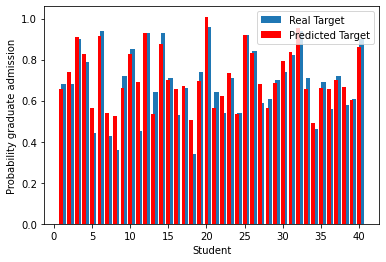

Alpha:
0.7981818181818182


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

df = pd.read_csv("Admission_Predict.csv")
# print(df)

# split targets and features
xi = df.drop(['Chance of Admit '],axis=1) # independant features
ti = df['Chance of Admit '] # targets

# split into training and test set
xi_train, xi_test, ti_train, ti_test = train_test_split(xi, ti, test_size=0.10, random_state=42)

# build Xtilde
Xtilde_train = np.hstack((np.ones((len(xi_train), 1)), xi_train))

# learn the regression model
regression = RidgeCV(alphas=np.linspace(0.001,1, 100).tolist()).fit(Xtilde_train, ti_train)

# predict for the test set
Xtilde_test = np.hstack((np.ones((len(xi_test), 1)), xi_test))
prediction = regression.predict(Xtilde_test)

# plot the result
targets = np.array(ti_test)
graph = plt.figure()
fig = graph.add_subplot()
fig.set_xlabel("Student")
fig.set_ylabel('Probability graduate admission')
plt.bar(np.arange(1, len(prediction)+1), targets, width = 0.6, align = "edge")
plt.bar(np.arange(1, len(prediction)+1), prediction, width = 0.5, color= 'r')
plt.legend(["Real Target ", "Predicted Target"])
plt.show()

# print(regression.score(xi_train_spe.values.reshape(-1,1), ti_train))
print("Alpha:")
print(regression.alpha_)



### Question 3. Iterative Hard and Soft Thresholding (10pts)


An alternative to the simple OLS criterion or to the Ridge regression model, LASSO regression minimizes a combination of a data fidelity term and a penalty on the sum of the absolute values of the regression coefficients, i.e.

\begin{align}
\ell(\boldsymbol \beta ) = \frac{1}{N}\sum_{i=1}^N (t^{(i)} - (\boldsymbol{\beta}^T \boldsymbol x^{(i)}))^2 + \lambda \sum_{j=0}^D |\beta_j|, \quad (\text{LASSO})
\end{align}

One of the main difficulty with the LASSO lies in the non differentiability of the absolute value which appears in the regularization term. Because of the use of the absolute value, the gradient cannot be computed at 0. Instead of relying on gradient updates, we can instead turn to the constrained formulation


\begin{align}
\min & \quad \ell(\boldsymbol \beta ) = \frac{1}{N}\sum_{i=1}^N (t^{(i)} - (\boldsymbol{\beta}^T \boldsymbol x^{(i)}))^2\\
\text{subject to}& \quad \sum_{j=0}^D |\beta_j|\leq t
\end{align}

The drawback with such a formulation is that we now have to solve a constrained problem. A common approach relies on the use of thresholding algorithms and in particular to the class of so-called _iterative shrinkage-thresholding algorithms (ISTA)_. If we write the OLS objective in matrix form as $\ell(\boldsymbol \beta) = \frac{1}{2N}\|\tilde{\mathbf{X}}\mathbf{\beta} - \mathbf{t}\|_2^2$, Iterative shrinkage-thresholding algorithms are based on the following update :


\begin{align}
\mathbf{\beta} \leftarrow \mathcal{T}_{\lambda \eta}\left\{\mathbf{\beta} - 2\eta \tilde{\mathbf{X}}^T\left(\tilde{\mathbf{X}}\mathbf{\beta} - \mathbf{t}\right) \right\}
\end{align}

where $\mathcal{T}$ is the thresholding operator 
\begin{align}
\mathcal{T}_{\alpha}(\mathbf{\beta})_i = \left(|\beta_i| - \alpha\right)_+\text{sign}(\beta_i)
\end{align}

Here $\left(|\beta_i| - \alpha\right)_+ = \max\left\{|\beta_i| - \alpha, 0\right\}$ and $\text{sign}(\beta_i)$ denotes the sign of the coefficient $\beta_i$. From the definition above, you can also see that $\lambda \eta$ acts as a threshold on the $\beta_i$. The larger $\lambda$, the more $\beta_i$ will be set to $0$. 


#### Question 3.1 (6pts) Complete the function ISTA below which should return a vector of weights $\mathbf{\beta}$, starting from some initial guess $\beta_{\text{init}}$ and for a training set stored in the matrix $X$ and vector of targets $t$.

In [8]:
# import dependencies
import numpy as np
from sklearn.model_selection import train_test_split

# function should apply the Iterative Shrinkage 
# Thresholding updates, starting from Beta_init and 
# for a set of feature vectors stored in matrix X 
# with associated targets stored in t.

def ISTA(beta_init, lamb, eta, X, t):
    # create X_tilde
    Xtilde = np.hstack((np.ones((len(X), 1)), X))
    
    # maximum number of iterations for the main for loop
    max_iter = 100
    
    # beta init
    beta_ISTA = beta_init
    
    # main loop
    for iter in np.arange(0, max_iter):

        XB = np.matmul(Xtilde, beta_ISTA.reshape(-1,1))
        # print(XB)

        XB_t = XB - t.reshape(-1,1)
        # print(XB_t)
        
        TwoEtaXtilde = 2 * eta * Xtilde.T
        # print(TwoEtaXtilde)
        
        product = np.matmul(TwoEtaXtilde, XB_t)
        # print(product)

        tmp = np.true_divide(beta_ISTA.reshape(-1,1) - product, len(X))
        # print(tmp)

        beta_ISTA = np.maximum(np.absolute(tmp)-lamb, np.zeros(len(tmp)).reshape(-1,1)) * np.sign(tmp) 
        # print(beta_ISTA)
        
    return beta_ISTA 

#### Question 3.2 (4pts) Test your algorithm on the dataset provided by the two files 'Assignment2_Ex32_Xi.npy' and 'Assignment2_Ex32_ti.npy' below. as above, two of the weights are irrelevant. Try to tune the parameters $\eta$ and $\lambda$ and study when you can recover those. 

In [9]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

# load the data
X = np.load('Assignment2_Ex32_Xi.npy')
t = np.load('Assignment2_Ex32_ti.npy')

# start with a random beta
beta_init = np.random.normal(0,1,len(X[0])+1) 

# weight for lasso regularization
lamb = 0.05 

# learning rate
eta = 0.2 

# compute the model
beta_ISTA = ISTA(beta_init, lamb, eta, X, t)

# print the model
print("Beta_ISTA:")
print(beta_ISTA)

Beta_ISTA:
[[-0.        ]
 [ 0.45779933]
 [ 0.12151702]
 [-0.        ]
 [ 0.15831574]
 [-0.00068004]]


### Question 4 (5pts). From regression to binary classification: Predicting deaths on the Titanic

We have seen how the OLS objective can be used to learn a regression model. This objective remains in fact absolutely valid in the classification framework. In binary classification, the targets associated to the feature vectors take one of two values (let us say $1$ and $0$ or $+1$ and $-1$). If we want to learn a model that classifies some feature vectors $\mathbf{x}^{(i)}$ as belonging to class $\mathcal{C}_0$ vs $\mathcal{C}_1$ and we are given a training set $C_{0, \text{tr}} = \left\{\mathbf{x}^{(i)}\right\}_{i=1}^{N_0}$ and $C_{1, \text{tr}} = \left\{\mathbf{x}^{(j)}\right\}_{j=1}^{N_1}$, we can try to learn a separating plane $\beta_0 +\beta_1 x_1 + \ldots \beta_D x_D$ such that $\beta_0 +\beta_1 x^{(i)}_1 + \ldots \beta_D x^{(i)}_D =+1 $ for all $x^{(i)}\in C_0$ and $\beta_0 +\beta_1 x^{(j)}_1 + \ldots \beta_D x^{(j)}_D =-1$ for all $x^{(j)}$ in $\mathcal{C}_1$. 

For any new point $\mathbf{x}$ of unknown class, we can then compute $\beta_0 +\beta_1x_1 + \ldots +\beta_D x_D$ and classify our point as belonging to $C_0$ if $\beta_0 +\beta_1x_1 + \ldots +\beta_D x_D>0$.

Combine this idea with the linear regression model from scikit learn to learn a linear binary classifier for the ['Titanic'](https://www.kaggle.com/c/titanic/data?select=test.csv) dataset from Kaggle. Start by loading the training and test data from this dataset and then complete the cell below.


In [10]:
# import dependencies
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv')

# split targets and features
xi = data.drop(['Survived'],axis=1) # features
ti = data['Survived'] # targets

# split into training set (90%) and test set (10%)
xi_train_tmp, xi_test_tmp, ti_train_tmp, ti_test_tmp = train_test_split(xi, ti, test_size=0.10, random_state=42)

# turn possible non numeric features to numbers and remove lines with nAn
def clean_xi(dataset):
    dataSet = dataset.copy(deep = True)
    for index, row in dataset.iterrows():
        if row['Sex'] == 'female':
            dataSet.loc[index, 'Sex'] = 0
        else:
            dataSet.loc[index, 'Sex'] = 1
    
    # remove useless columns
    # I choose to remove the column Age as there are too many nan values (162). 
    # removing 162 lines is removing too much information
    # As you told me ,I also decided to remove the columns that did not influence the model
    dataSet = dataSet.drop(['Name', "Ticket","Age","Cabin", "Embarked"],axis=1)
    return dataSet

# turn the class targets to binary or +1/-1 values.
def clean_ti(dataset):
    for index, row in dataset.iteritems():
        if row == 0:
            dataset.loc[index] = -1;
    return dataset

# # Step 1. 
# # =========================================================================
# # Use the linearRegression model from scikit learn with binary 
# # targets to predict the passengers that will survive and die in the 
# # case of the sinking of a ship. Start by turning the class targets to 
# # binary or +1/-1 values. Then turn possible non numeric features to numbers. Finally 
# # learn the separating plane.

ti_train = clean_ti(ti_train_tmp)
xi_train = clean_xi(xi_train_tmp)
   

# learn with the linear regression model from scikit learn
regression = LinearRegression()
regression.fit(xi_train.to_numpy(), ti_train.values.reshape(-1,1))

# Step 2. 
# =========================================================================
# Validate your model on the test set and compute the fraction of correctly 
# classified samples using the function accuracy_score from the sklearn.metrics module

# import
from sklearn.metrics import accuracy_score

xi_test = clean_xi(xi_test_tmp) # part of the data used to predict the result

# predict the targets
prediction = regression.predict(xi_test.to_numpy())

# associate a binary number with the prediction
for predicted in prediction:
    if predicted[0]<0:
        predicted[0] = 0
    else:
        predicted[0] = 1


score = accuracy_score(ti_test_tmp, prediction) * 100
print("The prediction's accuracy is " + str(score) + " %\n")   

# display data
ind = 0
for index, row in xi_test_tmp.iterrows():  
    print(row['Name'], end = ': ')
    if prediction[ind][0] == 1:
        print("\033[1m survived \033[0m (1)")
    else:
        print("\033[1m did NOT survive \033[0m (0)")
    ind += 1

The prediction's accuracy is 81.11111111111111 %

Moubarek, Master. Halim Gonios ("William George"):  did NOT survive  (0)
Kvillner, Mr. Johan Henrik Johannesson:  did NOT survive  (0)
Alhomaki, Mr. Ilmari Rudolf:  did NOT survive  (0)
Harper, Miss. Annie Jessie "Nina":  survived  (1)
Nicola-Yarred, Miss. Jamila:  survived  (1)
Barber, Miss. Ellen "Nellie":  survived  (1)
Kelly, Miss. Anna Katherine "Annie Kate":  survived  (1)
Vander Planke, Mr. Leo Edmondus:  did NOT survive  (0)
Carr, Miss. Helen "Ellen":  survived  (1)
Newsom, Miss. Helen Monypeny:  survived  (1)
Futrelle, Mr. Jacques Heath:  did NOT survive  (0)
Kelly, Mr. James:  did NOT survive  (0)
Lefebre, Miss. Jeannie:  survived  (1)
Attalah, Mr. Sleiman:  did NOT survive  (0)
Fox, Mr. Stanley Hubert:  did NOT survive  (0)
Lines, Miss. Mary Conover:  survived  (1)
Kimball, Mr. Edwin Nelson Jr:  did NOT survive  (0)
O'Leary, Miss. Hanora "Norah":  survived  (1)
Montvila, Rev. Juozas:  did NOT survive  (0)
Porter, Mr. Walter C